In [1]:
from detector import Detector
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

test_text = '''
Do you have a problem that you are struggling to solve? Why don't you ask your friends for advice? When people ask for advice on solving a problem, often times they speak to more than one person. This is because different views are better for figuring out a tough problem, many opinions are better than one, and other people may have experienced a problem like yours and may be able to help you in making better decisions.
'''

E:\Python_Projects\PrismAI\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8144\301221107.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset_path = "E:\\Python_Projects\\PrismAI\\data"

def get_essays(label, take):
    all_files = glob.glob(os.path.join(dataset_path, "*.csv"))
    df = None
    for filename in all_files:
        df = pd.concat([df, pd.read_csv(filename)[['text', 'label']]])
    print(f'Found {len(df)} essays.')

    # As a first step, we want to inject AI written sentences into human essays
    # and see if we can sort them out later again
    # 1 = AI generated, 0 = human written
    filtered_df = df[df['label'] == label].head(take)
    filtered_essays = filtered_df['text'].tolist()
    print(f'Processing {len(filtered_essays)} filtered essays.')
    return filtered_essays

# EDA

I'm trying to find patterns in the results of the detector.

In [3]:
detector = Detector()
print('Detector inited')

Model ensemble: ['gpt2']
Detector inited


## Testing

In [4]:
ai_essays = get_essays(1, 10)
hu_essays = get_essays(0, 10)

Found 159456 essays.
Processing 10 filtered essays.
Found 159456 essays.
Processing 10 filtered essays.


In [5]:
def analyse_essays(essays):
    num_plots_per_row = 3
    num_rows = len(essays)
    
    # Create subplots with specified layout
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array to make it easier to index
    axs = axs.flatten()
    
    for idx, essay in enumerate(essays):
        output = detector.detect(essay, sample_rate=3, sample_sequence_length=64)[0]
        
        for sample_idx, sample in enumerate(output['sample_results']):
            target_probs = [step['target_prob'] for step in sample['model_outputs']['steps']]
            
            # Plot the target_prob values
            axs[idx * num_plots_per_row + sample_idx].plot(target_probs)
            axs[idx * num_plots_per_row + sample_idx].set_title(f'Essay {idx + 1}, Sample {sample_idx + 1}')
            axs[idx * num_plots_per_row + sample_idx].set_xlabel('Step')
            axs[idx * num_plots_per_row + sample_idx].set_ylabel('target_prob')
        
        # Add a row divider
        axs[(idx + 1) * num_plots_per_row - 1].axhline(y=0, color='black', linewidth=2)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the plots
    plt.show()

Using gpt2 ===

Sampling round number 1 for gpt2.
Context sample: As an eighth-grade student, I have noticed that many people, including myself, struggle to achieve their goals and become the person they truly want to be. This is because people often try to fit into predetermined roles and expectations rather than embracing their unique qualities and talents.

One reason why people may not be happy with their decisions is that they may feel pressure to conform to societal norms and expectations. For example, some people may feel that they need to have a certain job or income level in order to be successful or happy. However, these expectations may not align with their personal values or passions, leading to feelings of unhappiness and dissatisfaction.

Additionally, the world can have a significant impact on people's ability to achieve their goals and become the person they want to be. For example, external factors such as economic conditions, political instability, and natural disaste

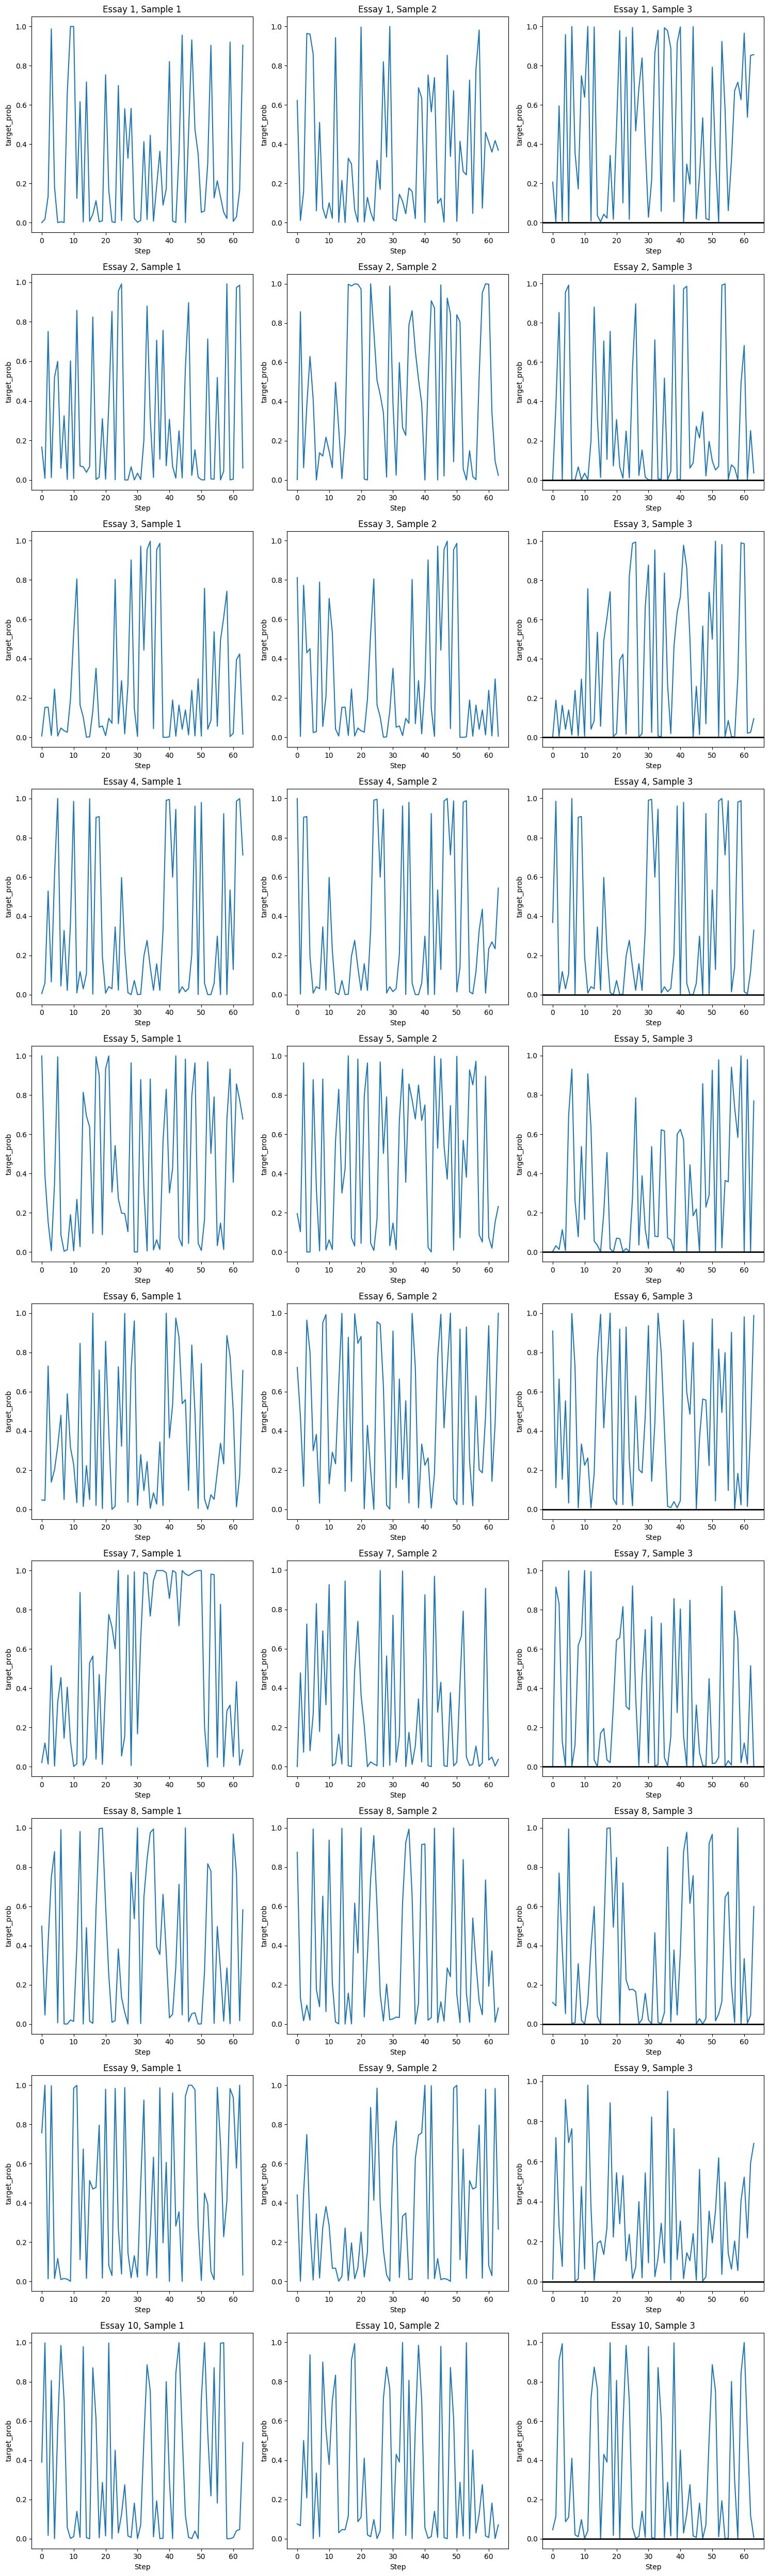

In [6]:
analyse_essays(hu_essays)